In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import warnings
warnings.filterwarnings(action='ignore')
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sb
import nltk
nltk.download('all')
import re
import string
import calendar
import wordcloud
from wordcloud import WordCloud, STOPWORDS
import spacy
import catboost as cb
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /usr/share/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /usr/share/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /usr/share/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /usr/share/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /usr/share/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    | Downloading package bcp47 to /usr/share/nltk_data...
[nltk_data]    | Downloading pa

/kaggle/input/fake-and-real-news-dataset/True.csv
/kaggle/input/fake-and-real-news-dataset/Fake.csv


#### Read the True & Fake Dataset

In [2]:
true_news_df= pd.read_csv('/kaggle/input/fake-and-real-news-dataset/True.csv')
fake_news_df= pd.read_csv('/kaggle/input/fake-and-real-news-dataset/Fake.csv')

In [3]:
true_news_df.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [4]:
fake_news_df.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [5]:
print(f'The shape of fake news dataset is: {fake_news_df.shape}')
print(f'The shape of true news dataset is: {true_news_df.shape}')

The shape of fake news dataset is: (23481, 4)
The shape of true news dataset is: (21417, 4)


In [6]:
fake_news_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


##### All are object datatypes. There are no missing values.

In [7]:
true_news_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB


##### There are object datatypes.No missing values.

In [8]:
### adding label of true for true data , fake for fake datasets
fake_news_df['News_Type']=['Fake' for i in range(fake_news_df.shape[0])]
true_news_df['News_Type']=['True' for i in range(true_news_df.shape[0])]

In [9]:
true_news_df.head()

,title,text,subject,date,News_Type
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",True
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",True
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",True
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",True
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",True


In [10]:
fake_news_df.head()

,title,text,subject,date,News_Type
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",Fake
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",Fake
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",Fake
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",Fake
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",Fake


In [11]:
### combine both data (true & fake row-wise)
combined_news_df= pd.concat([true_news_df,fake_news_df],axis=0)
combined_news_df

,title,text,subject,date,News_Type
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",True
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",True
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",True
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",True
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",True
...,...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",Fake
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",Fake
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",Fake
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",Fake


In [12]:
print(f'The shape of combined dataframe is: {combined_news_df.shape}')

The shape of combined dataframe is: (44898, 5)


In [13]:
###rename the columns [meaningful names]
combined_news_df.columns=['Article_Title','Article_Text','Article_Subject','Published_Date','News_Type']
combined_news_df.head()

,Article_Title,Article_Text,Article_Subject,Published_Date,News_Type
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",True
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",True
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",True
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",True
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",True


In [14]:
def valid_date(date_input):
    if re.match('[A-z]+\s+\d+,\s+\d{4}|\d+-\w+-\d{2}',date_input):
        return True
    else:
        return False
    
temp_data= combined_news_df.copy() 

temp_data['Valid_Date']= temp_data['Published_Date'].apply(lambda x: valid_date(x))
temp_data[temp_data['Valid_Date']== False]

,Article_Title,Article_Text,Article_Subject,Published_Date,News_Type,Valid_Date
9358,https://100percentfedup.com/served-roy-moore-v...,https://100percentfedup.com/served-roy-moore-v...,politics,https://100percentfedup.com/served-roy-moore-v...,Fake,False
15507,https://100percentfedup.com/video-hillary-aske...,https://100percentfedup.com/video-hillary-aske...,politics,https://100percentfedup.com/video-hillary-aske...,Fake,False
15508,https://100percentfedup.com/12-yr-old-black-co...,https://100percentfedup.com/12-yr-old-black-co...,politics,https://100percentfedup.com/12-yr-old-black-co...,Fake,False
15839,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,politics,https://fedup.wpengine.com/wp-content/uploads/...,Fake,False
15840,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,politics,https://fedup.wpengine.com/wp-content/uploads/...,Fake,False
17432,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,Government News,https://fedup.wpengine.com/wp-content/uploads/...,Fake,False
17433,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,Government News,https://fedup.wpengine.com/wp-content/uploads/...,Fake,False
18933,Homepage,[vc_row][vc_column width= 1/1 ][td_block_trend...,left-news,MSNBC HOST Rudely Assumes Steel Worker Would N...,Fake,False
21869,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,left-news,https://fedup.wpengine.com/wp-content/uploads/...,Fake,False
21870,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,left-news,https://fedup.wpengine.com/wp-content/uploads/...,Fake,False


In [15]:
### looking the above data, Article_Text & Article_Title has urls associated with it, and it is having less records (10), so we can exclude those...

In [16]:
### Remove the above data from combined_df
combined_news_df.drop(list(temp_data[temp_data['Valid_Date']== False].index),axis=0,inplace=True)
print(f'Final shape of combined_df is: {combined_news_df.shape}')

Final shape of combined_df is: (44880, 5)


In [17]:
combined_news_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44880 entries, 0 to 23480
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Article_Title    44880 non-null  object
 1   Article_Text     44880 non-null  object
 2   Article_Subject  44880 non-null  object
 3   Published_Date   44880 non-null  object
 4   News_Type        44880 non-null  object
dtypes: object(5)
memory usage: 2.1+ MB


### NLP Data Preprocessing & Feature Extraction

In [18]:
## create a helper function for preprocessing the text
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
wordnet_lemmatizer= WordNetLemmatizer()
eng_stopwords= stopwords.words('english')
def text_data_processing(text):
    ###convert to lower case
    text= text.lower()
    #remove punctuations from text 
    text_1= re.sub(f'[{string.punctuation}''’”“]+','',text)
    #tokenize the words
    text_list= word_tokenize(text_1)
    nonstopwords_list= [word for word in text_list if word not in eng_stopwords]
    ##lemmatizing the words
    nonstopwordslemmatize_words= [wordnet_lemmatizer.lemmatize(word) for word in nonstopwords_list]
    return ' '.join(nonstopwordslemmatize_words)
    

In [19]:
### split datasets (train & test datasets)
X= combined_news_df.drop('News_Type',axis=1)
y= combined_news_df['News_Type']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,stratify=y,random_state=0)
print(f'The size of train datasets is: {X_train.shape[0]},{y_train.shape}')
print(f'The size of test datasets is: {X_test.shape[0]},{y_test.shape}')

The size of train datasets is: 35904,(35904,)
The size of test datasets is: 8976,(8976,)


In [20]:
#### combine train data
train_data_df= pd.concat([X_train,y_train],axis=1)
train_data_df.reset_index(inplace=True)
train_data_df.drop('index',axis=1,inplace=True)
train_data_df

,Article_Title,Article_Text,Article_Subject,Published_Date,News_Type
0,Hillary Clinton Breaks Her Silence On Who She...,Everyone had their suspicions as to the timing...,News,"December 16, 2016",Fake
1,Italy's 5-Star says euro referendum is 'last r...,"CERNOBBIO, Italy (Reuters) - A referendum on I...",worldnews,"September 3, 2017",True
2,Germany's far-right AfD chooses nationalist as...,"HANOVER, Germany (Reuters) - Members of the an...",worldnews,"December 2, 2017",True
3,'He can count on us:' German SPD minister hail...,BERLIN (Reuters) - German Foreign Minister Sig...,worldnews,"September 26, 2017",True
4,New Zealand's Labour widens lead as governing ...,WELLINGTON (Reuters) - New Zealand s newly inv...,worldnews,"September 7, 2017",True
...,...,...,...,...,...
35899,China state media says U.S. trade probe will h...,SHANGHAI (Reuters) - A decision by the United ...,politicsNews,"August 15, 2017",True
35900,FOR BERNIE SANDERS FANS: Prisoners Eating Cats...,When Other People s Money Runs Out An NGO oper...,politics,"Sep 2, 2015",Fake
35901,"Mainstream Republicans fret as Trump, Cruz str...","NORTH CHARLESTON, S.C. (Reuters) - Two weeks b...",politicsNews,"January 15, 2016",True
35902,WATCH DINESH D’SOUZA Totally Embarrass Liberal...,If you want to try to dispute Dinesh D Souza s...,politics,"Aug 18, 2017",Fake


In [21]:
### while checking EDA for different News Type [Subject], there are some categories which is having same meaning but in different classes, so need to change to same category

indexes=train_data_df[train_data_df['Article_Subject'].str.lower()=='politicsnews'].index
print(indexes)

Int64Index([    6,     7,     8,     9,    14,    18,    20,    26,    28,
               34,
            ...
            35856, 35859, 35867, 35869, 35881, 35882, 35889, 35893, 35899,
            35901],
           dtype='int64', length=9038)


In [22]:
train_data_df.loc[indexes,['Article_Subject']]='politics'

train_data_df.head()

,Article_Title,Article_Text,Article_Subject,Published_Date,News_Type
0,Hillary Clinton Breaks Her Silence On Who She...,Everyone had their suspicions as to the timing...,News,"December 16, 2016",Fake
1,Italy's 5-Star says euro referendum is 'last r...,"CERNOBBIO, Italy (Reuters) - A referendum on I...",worldnews,"September 3, 2017",True
2,Germany's far-right AfD chooses nationalist as...,"HANOVER, Germany (Reuters) - Members of the an...",worldnews,"December 2, 2017",True
3,'He can count on us:' German SPD minister hail...,BERLIN (Reuters) - German Foreign Minister Sig...,worldnews,"September 26, 2017",True
4,New Zealand's Labour widens lead as governing ...,WELLINGTON (Reuters) - New Zealand s newly inv...,worldnews,"September 7, 2017",True


In [23]:
#printing the number of categories under each....
train_data_df['Article_Subject'].value_counts()

politics           14553
worldnews           8089
News                7225
left-news           3530
Government News     1264
US_News              636
Middle-east          607
Name: Article_Subject, dtype: int64

In [24]:
### preprocess the text (Article_Title and Article_Text and merge into single feature Article Content)
train_data_df['Article_Content']= train_data_df['Article_Title']+' '+train_data_df['Article_Text']
#getting count of non-words
train_data_df['Non-Words-Count']=train_data_df['Article_Content'].apply(lambda x: len(re.findall('\W',str(x))))
train_data_df['Article_Content']= train_data_df['Article_Content'].apply(lambda x: re.sub('\d+','',x))
train_data_df['Article_Content']= train_data_df['Article_Content'].apply(lambda x: re.sub(r'[^\w\s]','',x))
train_data_df['Article_Content']= train_data_df['Article_Content'].apply(lambda x: re.sub(r'\"','',x))
train_data_df['Article_Content']= train_data_df['Article_Content'].apply(lambda x: text_data_processing(x))
train_data_df.head()

,Article_Title,Article_Text,Article_Subject,Published_Date,News_Type,Article_Content,Non-Words-Count
0,Hillary Clinton Breaks Her Silence On Who She...,Everyone had their suspicions as to the timing...,News,"December 16, 2016",Fake,hillary clinton break silence think blame elec...,541
1,Italy's 5-Star says euro referendum is 'last r...,"CERNOBBIO, Italy (Reuters) - A referendum on I...",worldnews,"September 3, 2017",True,italy star say euro referendum last resort cer...,722
2,Germany's far-right AfD chooses nationalist as...,"HANOVER, Germany (Reuters) - Members of the an...",worldnews,"December 2, 2017",True,germany farright afd chooses nationalist colea...,553
3,'He can count on us:' German SPD minister hail...,BERLIN (Reuters) - German Foreign Minister Sig...,worldnews,"September 26, 2017",True,count u german spd minister hail macron eu spe...,153
4,New Zealand's Labour widens lead as governing ...,WELLINGTON (Reuters) - New Zealand s newly inv...,worldnews,"September 7, 2017",True,new zealand labour widens lead governing party...,502


In [25]:
#droppping article text and article title from dataframe as they are no longer needed
train_data_df=train_data_df.drop(['Article_Title','Article_Text'],axis=1)
train_data_df.head()

,Article_Subject,Published_Date,News_Type,Article_Content,Non-Words-Count
0,News,"December 16, 2016",Fake,hillary clinton break silence think blame elec...,541
1,worldnews,"September 3, 2017",True,italy star say euro referendum last resort cer...,722
2,worldnews,"December 2, 2017",True,germany farright afd chooses nationalist colea...,553
3,worldnews,"September 26, 2017",True,count u german spd minister hail macron eu spe...,153
4,worldnews,"September 7, 2017",True,new zealand labour widens lead governing party...,502


In [26]:
### take date and extract month and year (for data-analysis purposes, as these values won't have am effect on the fake/true news determination)
train_data_df['Published_Date']=pd.to_datetime(train_data_df['Published_Date'])
train_data_df['Published_Month']= train_data_df['Published_Date'].apply(lambda x: calendar.month_name[x.month])
train_data_df['Published_Year']= train_data_df['Published_Date'].dt.year
train_data_df.head()

,Article_Subject,Published_Date,News_Type,Article_Content,Non-Words-Count,Published_Month,Published_Year
0,News,2016-12-16,Fake,hillary clinton break silence think blame elec...,541,December,2016
1,worldnews,2017-09-03,True,italy star say euro referendum last resort cer...,722,September,2017
2,worldnews,2017-12-02,True,germany farright afd chooses nationalist colea...,553,December,2017
3,worldnews,2017-09-26,True,count u german spd minister hail macron eu spe...,153,September,2017
4,worldnews,2017-09-07,True,new zealand labour widens lead governing party...,502,September,2017


##### Data is fully prepared for Exploratory Data Analysis [EDA]

### Exploratory Data Analysis ---- General Study

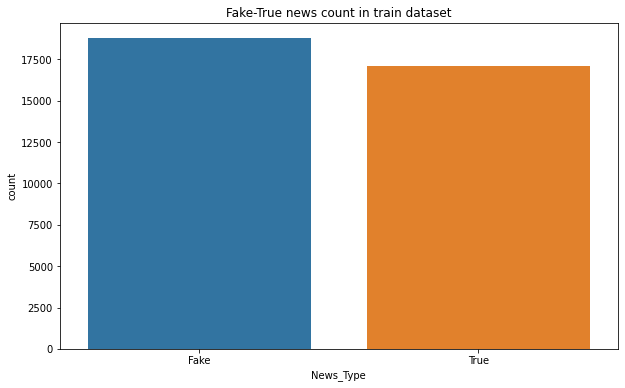

In [27]:
#### Analysing how many fake and true records are present in train_news_df dataset?
plt.figure(figsize=(10,6))
sb.countplot(train_data_df['News_Type'])
plt.title('Fake-True news count in train dataset')
plt.show()

### Observations:

1. Data is balanced [ even though True data < Fake data, but that difference is neggligible]

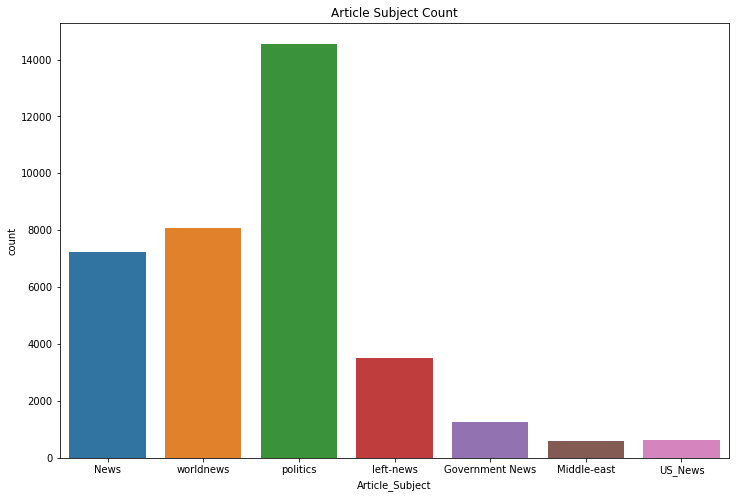

In [28]:
### Analyzing the article subject count in the train data
plt.figure(figsize=(12,8))
sb.countplot(train_data_df['Article_Subject'])
plt.title('Article Subject Count')
plt.show()

### Observations
1. Categories are not balanced across...., politics are higher in count than all 

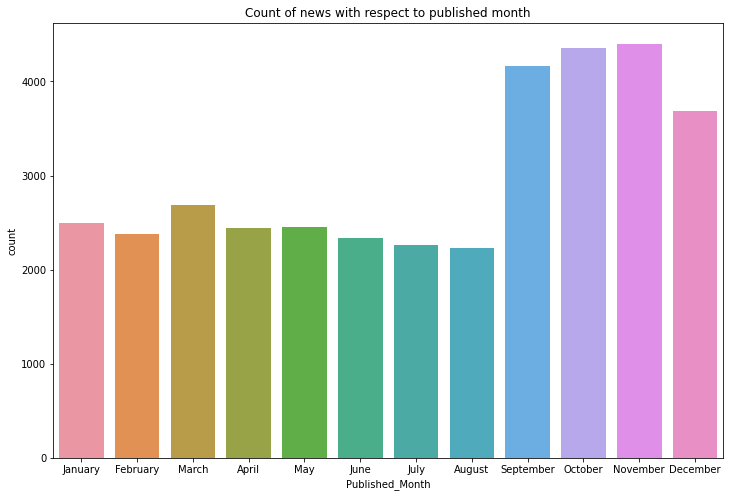

In [29]:
####taking count with respect to months
plt.figure(figsize=(12,8))
sb.countplot(data=train_data_df,x='Published_Month',order=['January','February','March','April','May','June','July','August','September','October','November','December'])
plt.title('Count of news with respect to published month')
plt.show()

##### Observations

1. Data is not balanced across all months, January to August is lowest while September to December is higher



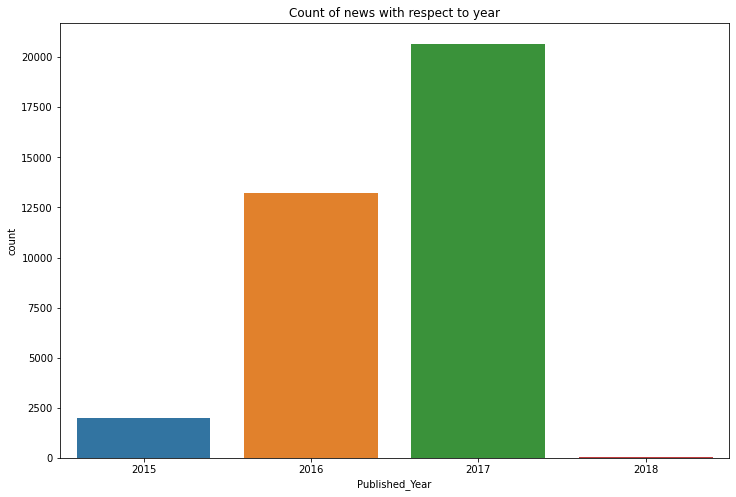

In [30]:
##### count taking with respect to published year
plt.figure(figsize=(12,8))
sb.countplot(data=train_data_df,x='Published_Year')
plt.title('Count of news with respect to year')
plt.show()

### Observations

1. Data is not balanced across all the year, 2017 has highest number of news data while 2018 has lowest.

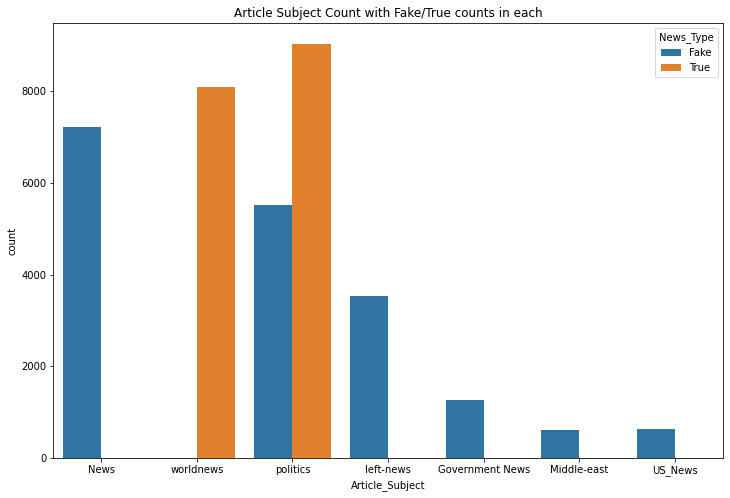

In [31]:
#### let's study with respect to fake news count with respect to each category.
#### with respect to new subject
plt.figure(figsize=(12,8))
sb.countplot(train_data_df['Article_Subject'],hue=train_data_df['News_Type'])
plt.title('Article Subject Count with Fake/True counts in each')
plt.show()

#### Observations
1. Looking at above plot, Fake news count are almost more than true news count

2. Categories like worldnews,politics has true news > fake news. [worldnews: no fake news at all]

3. Categories like News, left-news, govt-news,middle-east,us_news has no true news as per information from graph

To confirm, groupby plot table is plotted below, just to check exact count for each.

In [32]:
train_data_df.groupby('Article_Subject').aggregate({'News_Type':'value_counts'})

News_Type
Article_Subject News_Type           
Government News Fake            1264
Middle-east     Fake             607
News            Fake            7225
US_News         Fake             636
left-news       Fake            3530
politics        True            9038
                Fake            5515
worldnews       True            8089

confirmed that this feature comprises of fake news in majority

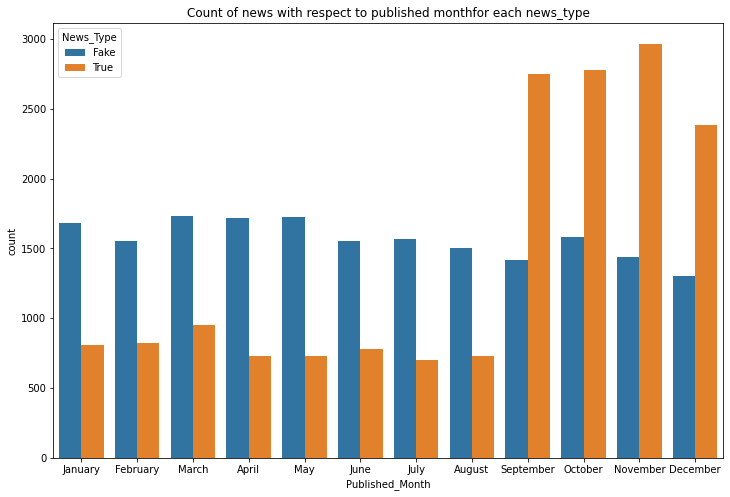

In [33]:
####taking count with respect to months for news type.
plt.figure(figsize=(12,8))
sb.countplot(data=train_data_df,x='Published_Month',order=['January','February','March','April','May','June','July','August','September','October','November','December'],hue='News_Type')
plt.title('Count of news with respect to published monthfor each news_type')
plt.show()

##### Observations

1. Looking at the above plot, fake news are less in count for Jan-Aug, while true news are having more count in Sep-Dec.

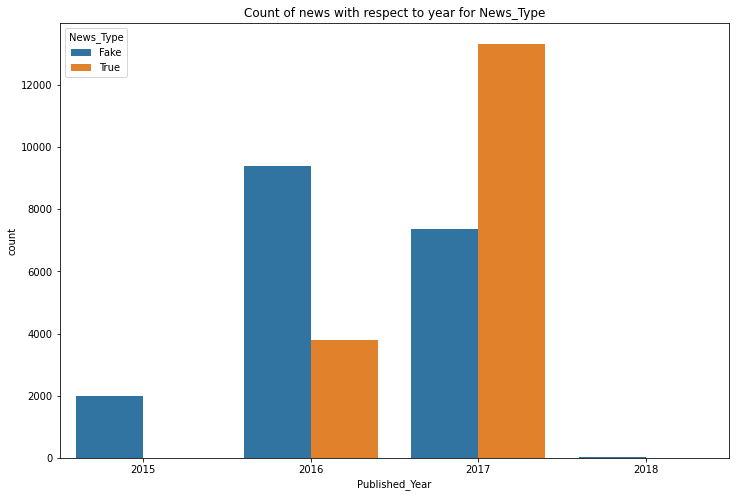

In [34]:
##### count taking with respect to published year for News_Type
plt.figure(figsize=(12,8))
sb.countplot(data=train_data_df,x='Published_Year',hue='News_Type')
plt.title('Count of news with respect to year for News_Type')
plt.show()

#### Observations

1. Most years has fake news count [as per data] more than true news count [ some have no true news at all].

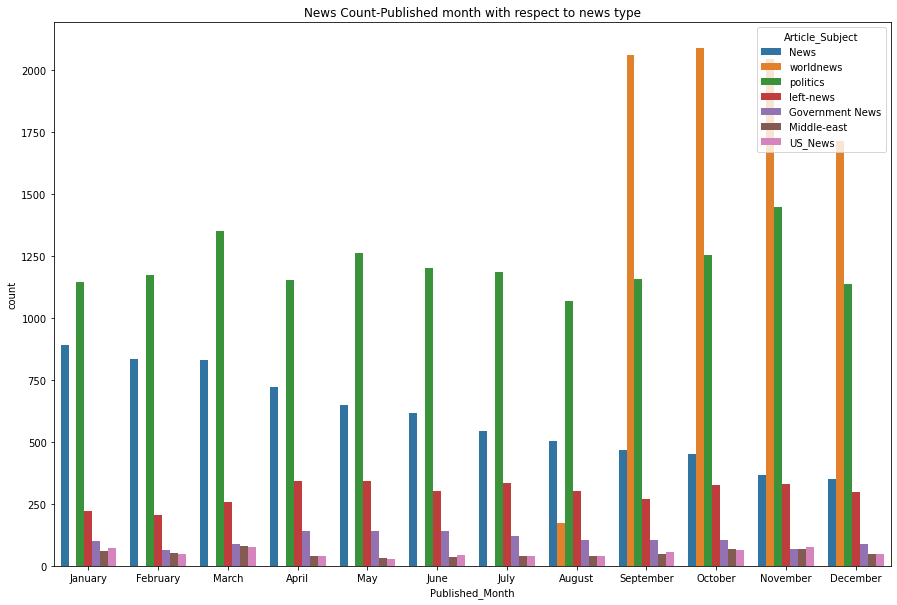

In [35]:
#### Analyzing article subject with respect to month.
plt.figure(figsize=(15,10))
sb.countplot(data=train_data_df,x='Published_Month',hue='Article_Subject',order=['January','February','March','April','May','June','July','August','September','October','November','December'])
plt.title('News Count-Published month with respect to news type')
plt.show()

#### Observations

1. Looking through the given data, politics news is high in frequency than others, expect for months like Sep,Oct,Nov,Dec where world news is higher in count.

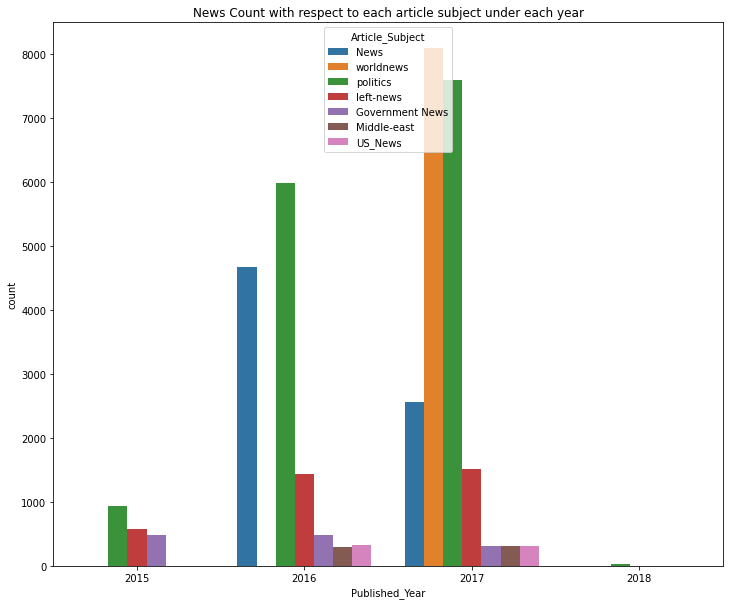

In [36]:
#### Analyzing news count with respect to each new subject under each year.
plt.figure(figsize=(12,10))
sb.countplot(data=train_data_df,x='Published_Year',hue='Article_Subject')
plt.title('News Count with respect to each article subject under each year')
plt.show()

#### Observations

1 With respect to year, politics news are higher in frequency with respect to all years.

#### Feature Extraction from text data using TF-IDF 

In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer
### assigned max_df=100, signifying that ignore words/terms that appears in more than 100 documents [ thus reducing size]
tf_idf_vectorizer= TfidfVectorizer(max_df=0.3,min_df=0.05)
temp_data= tf_idf_vectorizer.fit_transform(train_data_df['Article_Content'])
#X_text_data= pd.DataFrame(temp_data.toarray(), columns=tf_idf_vectorizer.get_feature_names())


In [38]:
X_text_data= pd.DataFrame(temp_data.toarray(), columns=tf_idf_vectorizer.get_feature_names())
X_text_data.head()

,able,access,according,account,accused,across,act,action,actually,added,...,worked,worker,working,world,wrong,wrote,yearold,yet,york,young
0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.058033,0.000000,0.0,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.057943,0.0
1,0.0,0.080748,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.080507,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0
2,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.075528,0.0,...,0.000000,0.0,0.000000,0.062855,0.000000,0.0,0.0,0.0,0.000000,0.0
3,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0
4,0.0,0.000000,0.043716,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.000000,0.0,0.054535,0.000000,0.065487,0.0,0.0,0.0,0.000000,0.0


In [39]:
X_text_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35904 entries, 0 to 35903
Columns: 595 entries, able to young
dtypes: float64(595)
memory usage: 163.0 MB


In [40]:
train_data_df.columns

Index(['Article_Subject', 'Published_Date', 'News_Type', 'Article_Content',
       'Non-Words-Count', 'Published_Month', 'Published_Year'],
      dtype='object')

In [41]:
#dropping 3 features {dates components} and adding 2 new features, one represent word count and other length of article content
train_data_df= train_data_df.drop(['Published_Date','Published_Month', 'Published_Year'],axis=1)
train_data_df['Article_Content_Length']= train_data_df['Article_Content'].apply(lambda x: len(str(x)))
train_data_df['tokenized_content']= train_data_df['Article_Content'].apply(lambda x: word_tokenize(str(x)))
train_data_df['word_count']= train_data_df['tokenized_content'].apply(lambda x: len(x))

train_data_df.head()

,Article_Subject,News_Type,Article_Content,Non-Words-Count,Article_Content_Length,tokenized_content,word_count
0,News,Fake,hillary clinton break silence think blame elec...,541,1856,"[hillary, clinton, break, silence, think, blam...",250
1,worldnews,True,italy star say euro referendum last resort cer...,722,2467,"[italy, star, say, euro, referendum, last, res...",343
2,worldnews,True,germany farright afd chooses nationalist colea...,553,2002,"[germany, farright, afd, chooses, nationalist,...",274
3,worldnews,True,count u german spd minister hail macron eu spe...,153,562,"[count, u, german, spd, minister, hail, macron...",78
4,worldnews,True,new zealand labour widens lead governing party...,502,1762,"[new, zealand, labour, widens, lead, governing...",245


### EDA ---- NLP Study

In [42]:
#### plotting non-word count 

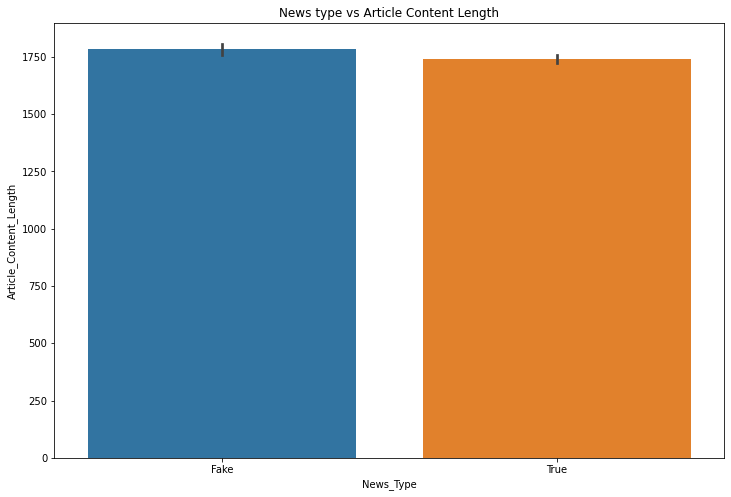

In [43]:
# plotting the average article length for fake and true news
plt.figure(figsize=(12,8))
sb.barplot(data=train_data_df,x='News_Type',y='Article_Content_Length')
plt.title('News type vs Article Content Length')
plt.show()

#### Observations
1. For each news type, article content length (on average) is almost same. so article content length does not have an impact by News Type.

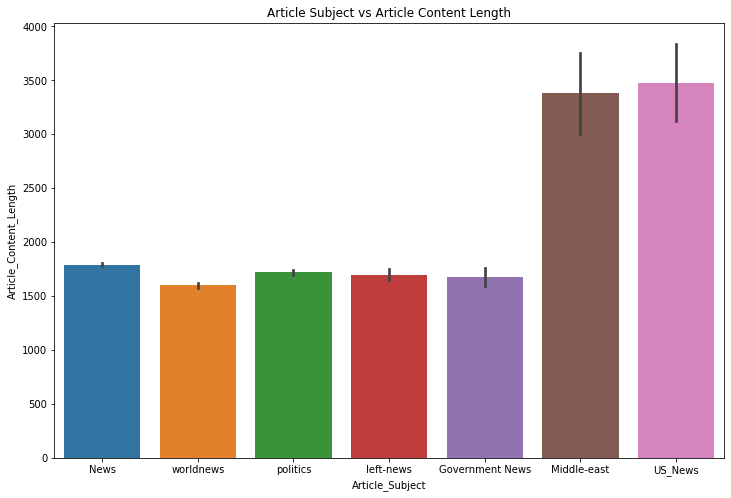

In [44]:
#plotting with respect to Article_Content_Length on basis of news_subject
plt.figure(figsize=(12,8))
sb.barplot(data=train_data_df,x='Article_Subject',y='Article_Content_Length')
plt.title('Article Subject vs Article Content Length')
plt.show()

#### Observations

1. Article content length is higher for news categories like Middle-East, US_News while lower for others.

<Figure size 1296x720 with 0 Axes>

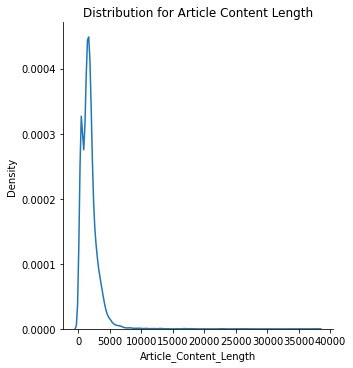

In [45]:
#### plotting distribution of article length.
plt.figure(figsize=(18,10))
sb.displot(train_data_df['Article_Content_Length'],kind="kde")
plt.title('Distribution for Article Content Length')
plt.show()

#### Observations
1. Distribution plot is skewed towards right (as right tail extends longer in right)


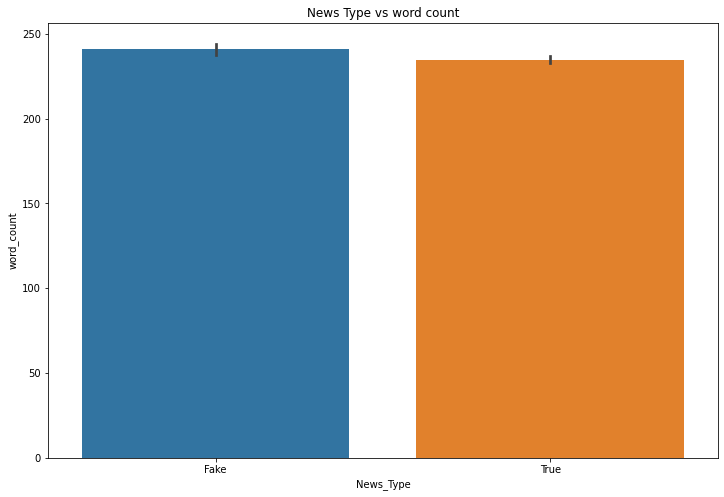

In [46]:
###plotting with respect to word count.
plt.figure(figsize=(12,8))
sb.barplot(data=train_data_df,x='News_Type',y='word_count')
plt.title('News Type vs word count')
plt.show()

#### Observations
1. word count is almost simmilar on both news type.

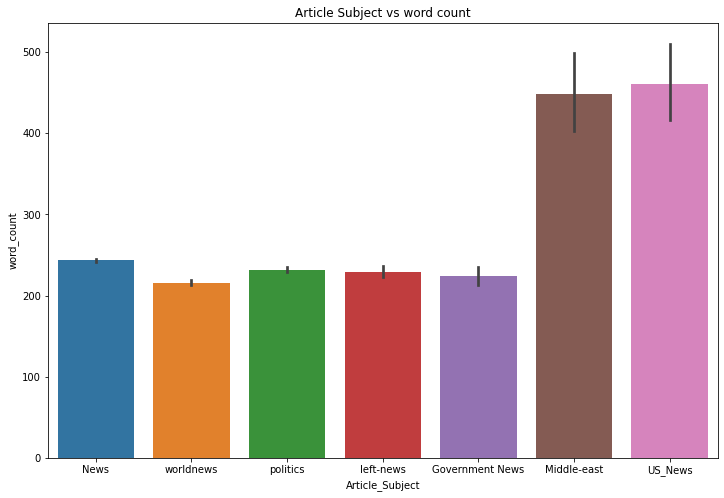

In [47]:
###plotting with respect to word count.[w.r.t article_subject]
plt.figure(figsize=(12,8))
sb.barplot(data=train_data_df,x='Article_Subject',y='word_count')
plt.title('Article Subject vs word count')
plt.show()

#### Observations
1. word count (on average) is higher in middle-east, us_news while lower for others [ simmilar pattern as article_content_length]

<Figure size 864x576 with 0 Axes>

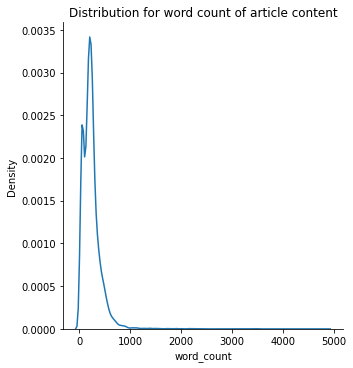

In [48]:
#### plotting distribution of word count.
plt.figure(figsize=(12,8))
sb.displot(train_data_df['word_count'],kind='kde')
plt.title('Distribution for word count of article content')
plt.show()

#### Observations
1. it is right skewed distribution [ simmilar to article content length]

#### Word Frequency Distributions of News [Both Fake, True ]

In [49]:
##### studying word count distributions of all news data
from nltk import FreqDist
allwords= train_data_df['tokenized_content']
all_news_words=[]
for word_list in allwords:
    all_news_words.extend(word_list)


In [50]:
most_common_25_words= FreqDist(all_news_words).most_common(25)
print(most_common_25_words)

[('trump', 113498), ('said', 104143), ('u', 54758), ('state', 47521), ('would', 44172), ('president', 43613), ('people', 33356), ('republican', 31966), ('one', 30129), ('year', 28053), ('new', 26250), ('also', 25021), ('clinton', 24062), ('house', 23732), ('say', 23443), ('government', 23152), ('reuters', 23130), ('donald', 22736), ('time', 22122), ('obama', 21655), ('country', 20051), ('election', 19486), ('could', 19412), ('white', 19306), ('party', 18952)]


In [51]:
#### convert to dataframe
most_25_words_df= pd.DataFrame(most_common_25_words,columns=['Words','Frequency'])
most_25_words_df

,Words,Frequency
0,trump,113498
1,said,104143
2,u,54758
3,state,47521
4,would,44172
5,president,43613
6,people,33356
7,republican,31966
8,one,30129
9,year,28053


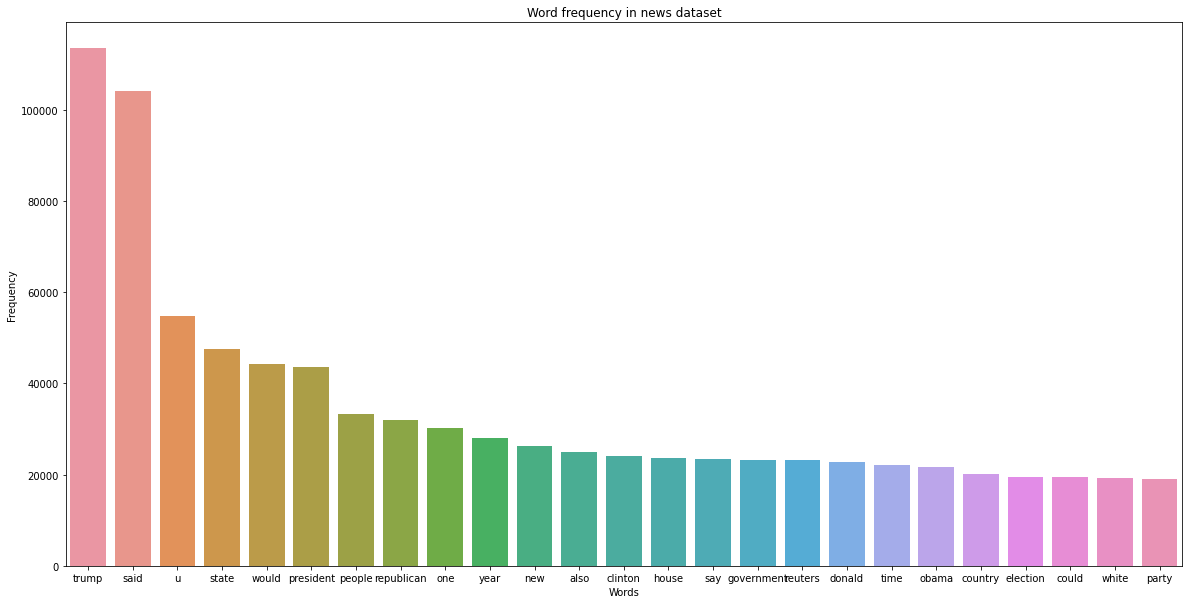

In [52]:
####plotting frequency distribution of the most common 25 words in dataset.
plt.figure(figsize=(20,10))
sb.barplot(data=most_25_words_df,x='Words',y='Frequency')
plt.title('Word frequency in news dataset')
plt.show()

###### Observations
1. most common 25 words in dataset is shown above

2. From this plot, trump is most common word with frequency of more than 1,00,000


In [53]:
train_data_df.head()

,Article_Subject,News_Type,Article_Content,Non-Words-Count,Article_Content_Length,tokenized_content,word_count
0,News,Fake,hillary clinton break silence think blame elec...,541,1856,"[hillary, clinton, break, silence, think, blam...",250
1,worldnews,True,italy star say euro referendum last resort cer...,722,2467,"[italy, star, say, euro, referendum, last, res...",343
2,worldnews,True,germany farright afd chooses nationalist colea...,553,2002,"[germany, farright, afd, chooses, nationalist,...",274
3,worldnews,True,count u german spd minister hail macron eu spe...,153,562,"[count, u, german, spd, minister, hail, macron...",78
4,worldnews,True,new zealand labour widens lead governing party...,502,1762,"[new, zealand, labour, widens, lead, governing...",245


In [54]:
#### take fake news data only and true news datasets
fake_news_df= train_data_df[train_data_df['News_Type']=='Fake']
true_news_df= train_data_df[train_data_df['News_Type']=='True']


In [55]:
true_common_words= []
for word_list in true_news_df['tokenized_content']:
    true_common_words.extend(word_list)

most_true_freqdist_25_df= pd.DataFrame(FreqDist(true_common_words).most_common(25),columns=['Word','Frequency'])
most_true_freqdist_25_df.head()


,Word,Frequency
0,said,79320
1,trump,48076
2,u,36096
3,state,29491
4,would,25393


In [56]:
fake_common_words=[]
for word_list in fake_news_df['tokenized_content']:
    fake_common_words.extend(word_list)
less_fake_words= pd.DataFrame(FreqDist(fake_common_words).most_common(),columns=['Word','Frequency'])
less_fake_words= less_fake_words[less_fake_words['Frequency']<=3]
less_fake_words.head()

,Word,Frequency
37055,nameaccording,3
37056,bleakest,3
37057,saysas,3
37058,evanston,3
37059,nonmajor,3


In [57]:
less_true_freqdist_25_df= pd.DataFrame(FreqDist(true_common_words).most_common(),columns=['Word','Frequency'])
#less_true_freqdist_25_df.sort_values(by='Frequency',ascending=True,inplace=True)
#taking list of words having frequency count<20
less_true_freqdist_25_df=less_true_freqdist_25_df[less_true_freqdist_25_df['Frequency']<=3]
less_true_freqdist_25_df


,Word,Frequency
27649,cernobbio,3
27650,ambrosetti,3
27651,stampa,3
27652,perilously,3
27653,reemerging,3
...,...,...
65248,meedee,1
65249,issara,1
65250,leadingmen,1
65251,danner,1


In [58]:
less_fake_most_common_words=pd.DataFrame()

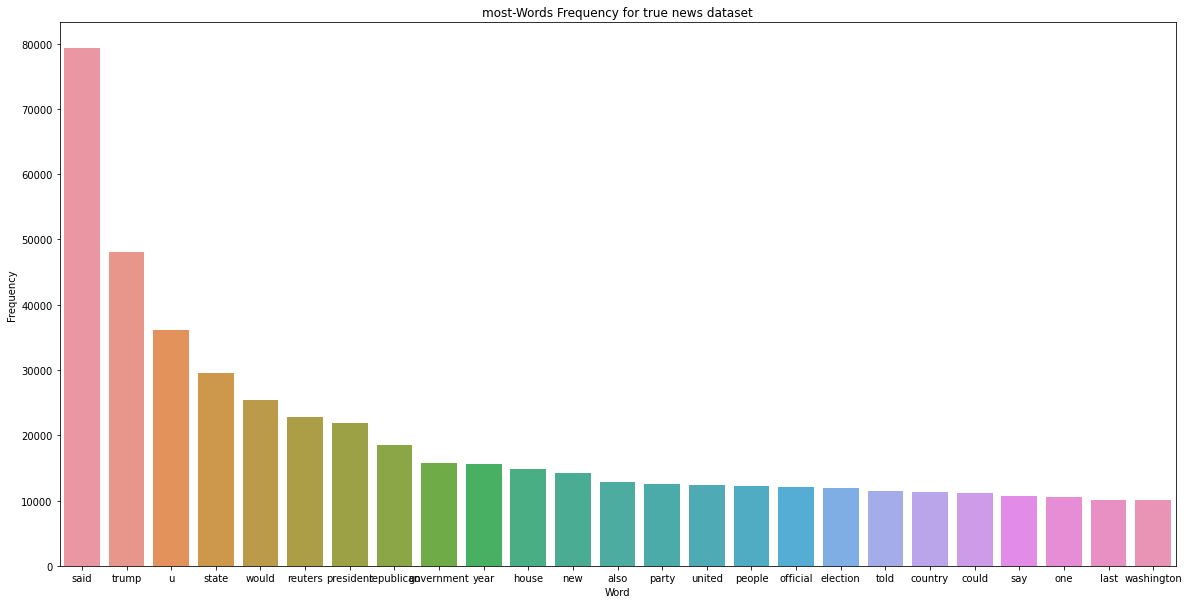

In [59]:
##### plotting graphs (bar) for word frequency for true news.
plt.figure(figsize=(20,10))
sb.barplot(data=most_true_freqdist_25_df,x='Word',y='Frequency')
plt.title('most-Words Frequency for true news dataset')
plt.show()

In [60]:
def generate_wordcloud(strwords,title):
    stopwords= set(STOPWORDS)
    wordcloud=WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(strwords)
    plt.figure(figsize = (8, 8), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)
    plt.title(title)
    plt.show()
    
    

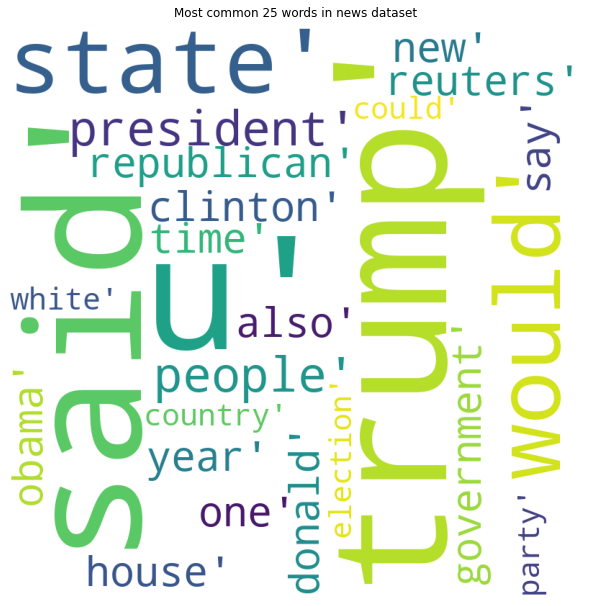

In [61]:
final_words_all=str(most_common_25_words)
generate_wordcloud(final_words_all,'Most common 25 words in news dataset')


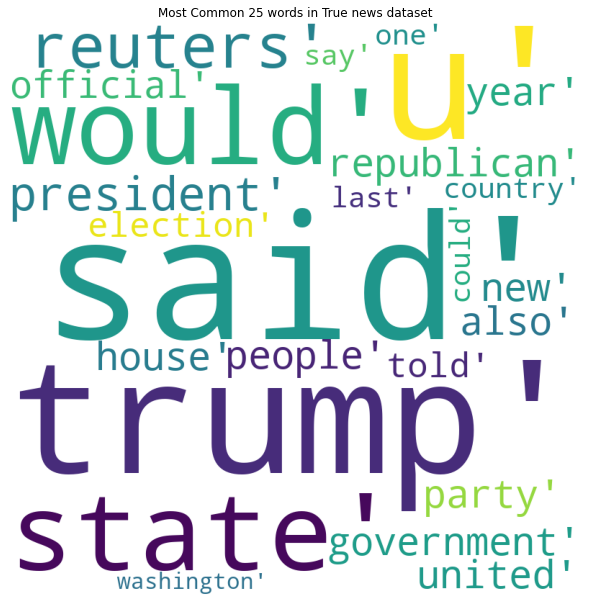

In [62]:
#### most requently occuring 25 words in true news dataset
final_word= str(str(FreqDist(true_common_words).most_common(25)))
generate_wordcloud(final_word,'Most Common 25 words in True news dataset')
    

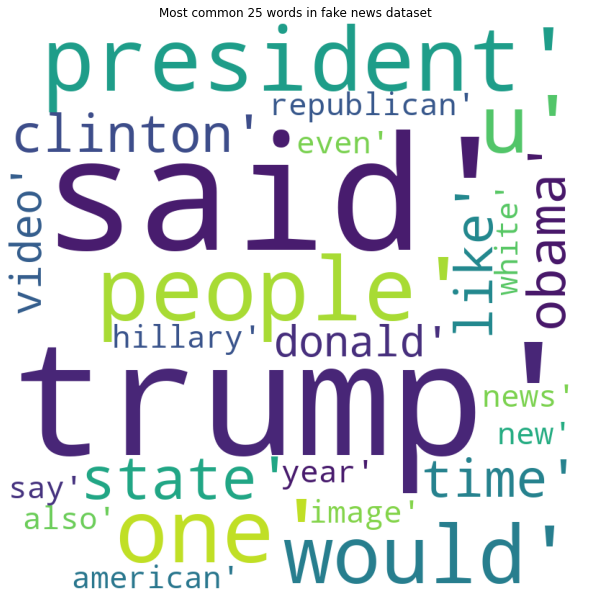

In [63]:
#### most commonly occuring words in fake news dataset
fake_common_words= []
for word_list in fake_news_df['tokenized_content']:
    fake_common_words.extend(word_list)

generate_wordcloud(str(FreqDist(fake_common_words).most_common(25)),'Most common 25 words in fake news dataset')

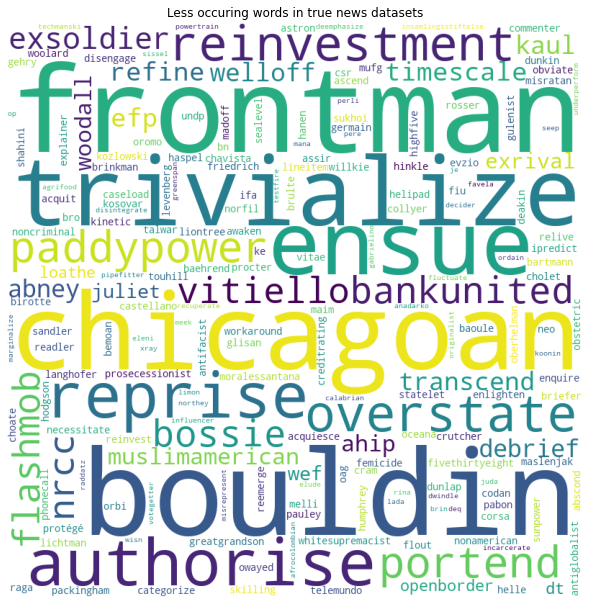

In [64]:
#### less occuring words under true news dataset
final_word_true_less=' '.join(less_true_freqdist_25_df['Word'])
generate_wordcloud(final_word_true_less,'Less occuring words in true news datasets')

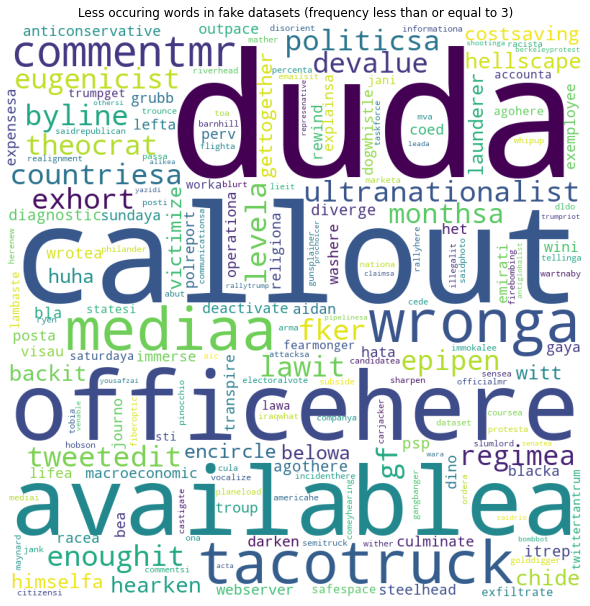

In [65]:
#### less occuring words in fake news
final_word_less_fake=' '.join(less_fake_words['Word'])
generate_wordcloud(final_word_less_fake,'Less occuring words in fake datasets (frequency less than or equal to 3)')

In [66]:
train_data_df.head()

,Article_Subject,News_Type,Article_Content,Non-Words-Count,Article_Content_Length,tokenized_content,word_count
0,News,Fake,hillary clinton break silence think blame elec...,541,1856,"[hillary, clinton, break, silence, think, blam...",250
1,worldnews,True,italy star say euro referendum last resort cer...,722,2467,"[italy, star, say, euro, referendum, last, res...",343
2,worldnews,True,germany farright afd chooses nationalist colea...,553,2002,"[germany, farright, afd, chooses, nationalist,...",274
3,worldnews,True,count u german spd minister hail macron eu spe...,153,562,"[count, u, german, spd, minister, hail, macron...",78
4,worldnews,True,new zealand labour widens lead governing party...,502,1762,"[new, zealand, labour, widens, lead, governing...",245


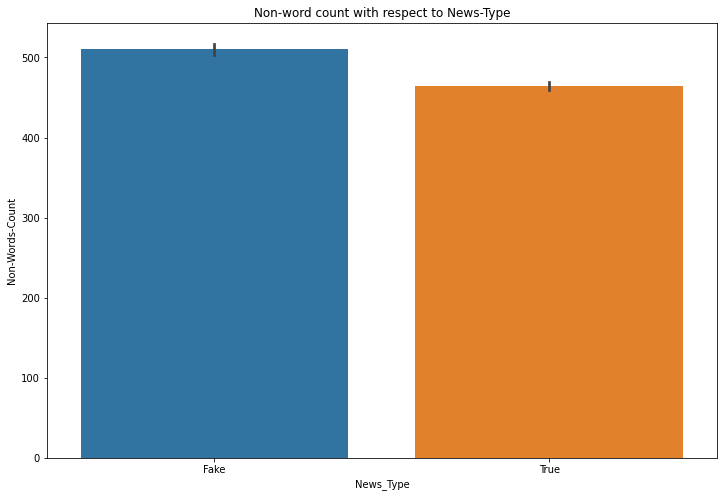

In [67]:
##### plotting non-word count with respect to true and fake news
plt.figure(figsize=(12,8))
sb.barplot(data=train_data_df,x='News_Type',y='Non-Words-Count')
plt.title('Non-word count with respect to News-Type')
plt.show()

##### Observations

1. Non-word count seems to be little higher in Fake news rather than True [may be because of number of records , no of records (fake)>no of records(true)]



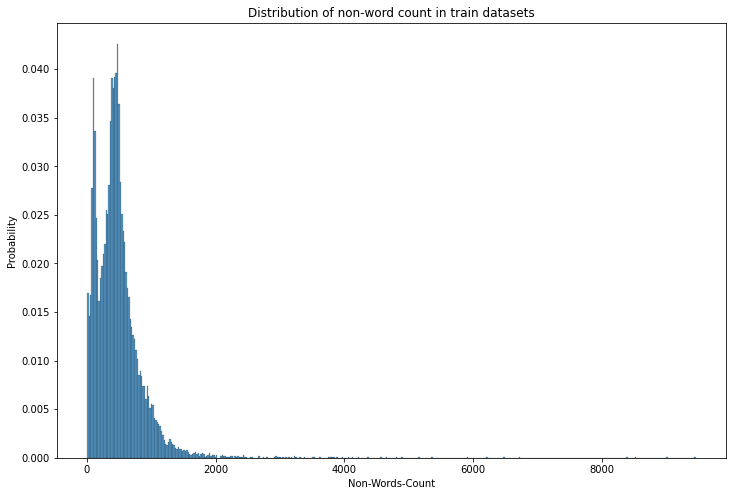

In [68]:
##### plotting distribution of word-count
plt.figure(figsize=(12,8))
sb.histplot(train_data_df['Non-Words-Count'],stat='probability')
plt.title('Distribution of non-word count in train datasets')
plt.show()


##### Observations

1. Data is skewed right [ right tail longer]

In [69]:
train_data_df.columns

Index(['Article_Subject', 'News_Type', 'Article_Content', 'Non-Words-Count',
       'Article_Content_Length', 'tokenized_content', 'word_count'],
      dtype='object')

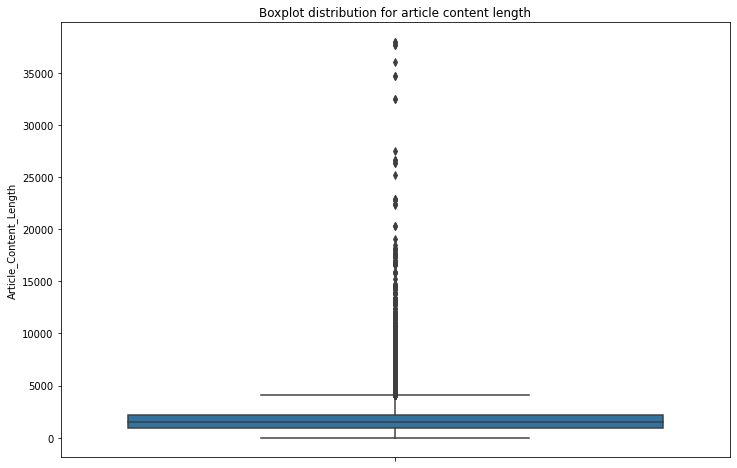

In [70]:
#### boxplot for  content length
plt.figure(figsize=(12,8))
sb.boxplot(data=train_data_df,y='Article_Content_Length')
plt.title('Boxplot distribution for article content length')
plt.show()

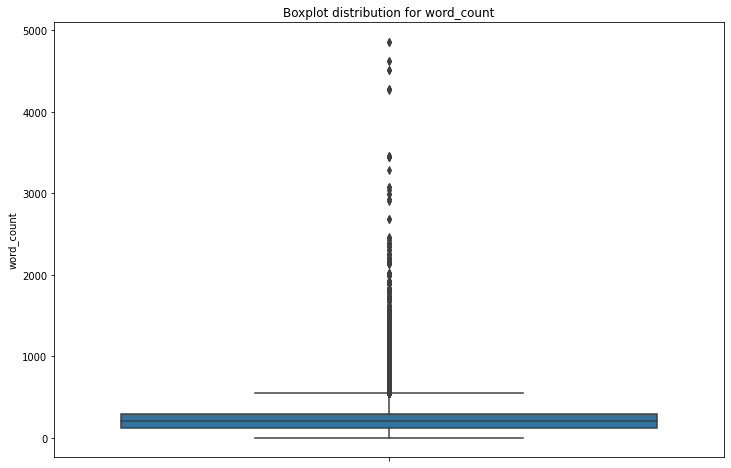

In [71]:
#### boxplot for  word count
plt.figure(figsize=(12,8))
sb.boxplot(data=train_data_df,y='word_count')
plt.title('Boxplot distribution for word_count')
plt.show()

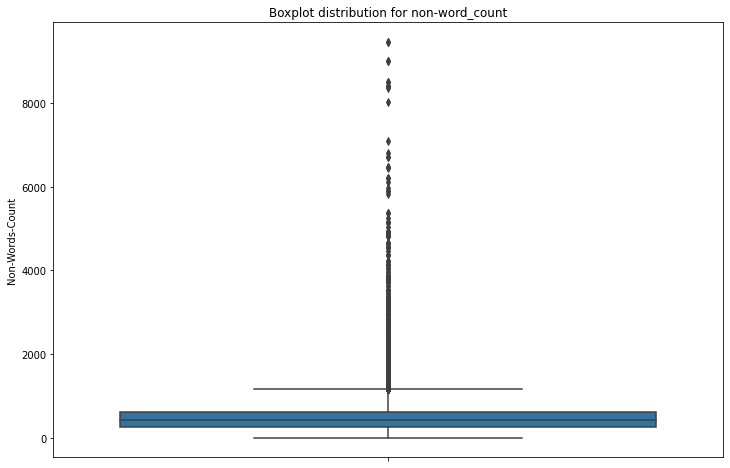

In [72]:
# boxplot for non-word count
plt.figure(figsize=(12,8))
sb.boxplot(data=train_data_df,y='Non-Words-Count')
plt.title('Boxplot distribution for non-word_count')
plt.show()

## Feature Engineering 

In [73]:
#### deleting some data/feature from train_data df , encoding the categorical variables etc.

train_data_df.head()

,Article_Subject,News_Type,Article_Content,Non-Words-Count,Article_Content_Length,tokenized_content,word_count
0,News,Fake,hillary clinton break silence think blame elec...,541,1856,"[hillary, clinton, break, silence, think, blam...",250
1,worldnews,True,italy star say euro referendum last resort cer...,722,2467,"[italy, star, say, euro, referendum, last, res...",343
2,worldnews,True,germany farright afd chooses nationalist colea...,553,2002,"[germany, farright, afd, chooses, nationalist,...",274
3,worldnews,True,count u german spd minister hail macron eu spe...,153,562,"[count, u, german, spd, minister, hail, macron...",78
4,worldnews,True,new zealand labour widens lead governing party...,502,1762,"[new, zealand, labour, widens, lead, governing...",245


In [74]:
temp_train_data_copy= train_data_df.copy()
train_data_df.drop(['Article_Content','tokenized_content'],axis=1,inplace=True)
train_data_df.head()

,Article_Subject,News_Type,Non-Words-Count,Article_Content_Length,word_count
0,News,Fake,541,1856,250
1,worldnews,True,722,2467,343
2,worldnews,True,553,2002,274
3,worldnews,True,153,562,78
4,worldnews,True,502,1762,245


In [75]:
#### group features in correct order.

train_data_df= train_data_df[['Article_Subject','Non-Words-Count','Article_Content_Length','word_count','News_Type']]
train_data_df.columns=['Article_Subject','Special-Characters-Count','Article_Content_Length','word_count','News_Type']
train_data_df.head()

,Article_Subject,Special-Characters-Count,Article_Content_Length,word_count,News_Type
0,News,541,1856,250,Fake
1,worldnews,722,2467,343,True
2,worldnews,553,2002,274,True
3,worldnews,153,562,78,True
4,worldnews,502,1762,245,True


In [76]:
#texual data 
X_text_data.head()

,able,access,according,account,accused,across,act,action,actually,added,...,worked,worker,working,world,wrong,wrote,yearold,yet,york,young
0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.058033,0.000000,0.0,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.057943,0.0
1,0.0,0.080748,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.080507,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0
2,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.075528,0.0,...,0.000000,0.0,0.000000,0.062855,0.000000,0.0,0.0,0.0,0.000000,0.0
3,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0
4,0.0,0.000000,0.043716,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.000000,0.0,0.054535,0.000000,0.065487,0.0,0.0,0.0,0.000000,0.0


## Feature Selection [ Comparing different sets of features]

In [77]:
#### encoding the categorical features
train_data_df_copy= train_data_df.copy()
from sklearn.preprocessing import LabelEncoder
le_encoder_1= LabelEncoder()
train_data_df_copy['Article_Subject']= le_encoder_1.fit_transform(train_data_df_copy['Article_Subject'])
le_encoder_2= LabelEncoder()
train_data_df_copy['News_Type']= le_encoder_2.fit_transform(train_data_df_copy['News_Type'])
train_data_df_copy.head()

,Article_Subject,Special-Characters-Count,Article_Content_Length,word_count,News_Type
0,2,541,1856,250,0
1,6,722,2467,343,1
2,6,553,2002,274,1
3,6,153,562,78,1
4,6,502,1762,245,1


In [78]:
train_data_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35904 entries, 0 to 35903
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Article_Subject           35904 non-null  int64
 1   Special-Characters-Count  35904 non-null  int64
 2   Article_Content_Length    35904 non-null  int64
 3   word_count                35904 non-null  int64
 4   News_Type                 35904 non-null  int64
dtypes: int64(5)
memory usage: 1.4 MB


In [79]:
#### performing t-test on features Special-Characters-Count, Article_Content_Length,word_count with respect to News_Type
from scipy.stats import ttest_ind
p_value=[]
sample0= train_data_df_copy[train_data_df_copy['News_Type']==0]
sample1= train_data_df_copy[train_data_df_copy['News_Type']==1]
for i in ['Special-Characters-Count','Article_Content_Length','word_count']:
    
    print(f't-test result for feature {i}')
    t_stat,p_val= ttest_ind(sample0[i],sample1[i])
    print('t-stat: ',t_stat)
    print('p-val: ',p_val)
    p_value.append(p_val)

final_features_df= pd.DataFrame({'Feature':['Special-Characters-Count','Article_Content_Length','word_count'],'Target-Feature':['News_Type' for i in range(3)],'P Value':p_value})
print('final datatable')
final_features_df
    
    

t-test result for feature Special-Characters-Count
t-stat:  10.445566852937235
p-val:  1.6702997107844786e-25
t-test result for feature Article_Content_Length
t-stat:  2.634299104223667
p-val:  0.008434735133231428
t-test result for feature word_count
t-stat:  2.876354230863992
p-val:  0.00402534748480225
final datatable


,Feature,Target-Feature,P Value
0,Special-Characters-Count,News_Type,1.670300e-25
1,Article_Content_Length,News_Type,8.434735e-03
2,word_count,News_Type,4.025347e-03


### Observations

1. P value is small (less than 0.05) for all the features. hence null hypothesis is rejected, which implies group mean is not same for all categories."

In [80]:
#### perform chi-square test on categorical features
train_data_df_copy.head()

,Article_Subject,Special-Characters-Count,Article_Content_Length,word_count,News_Type
0,2,541,1856,250,0
1,6,722,2467,343,1
2,6,553,2002,274,1
3,6,153,562,78,1
4,6,502,1762,245,1


In [81]:
from scipy.stats import chi2_contingency
contigency= pd.crosstab(train_data_df_copy['Article_Subject'],train_data_df_copy['News_Type'])
#print('contigency table')
#print(contigency)
chi2_stat,p_val,dof,expected= chi2_contingency(contigency)
print(f'chi2 test stat: {chi2_stat}')
print(f'p value: {p_val}')
if p_val<0.05:
    print('Article Subject and News_Type are not independent')
else:
    print('Article Subject and News_Type are independent')

chi2 test stat: 22174.855029404258
p value: 0.0
Article Subject and News_Type are not independent


##### Observations

1. News_Type and Article_Subject are not independent. 

In [82]:
del train_data_df_copy

## Applying model on text-dataset [TF-IDF vectorized]

In [83]:
#### delete unsused variables
del fake_news_df,true_news_df,combined_news_df,temp_data,indexes,temp_train_data_copy

In [84]:
from sklearn.preprocessing import LabelEncoder
le_1= LabelEncoder()
train_data_df['News_Type']= le_1.fit_transform(train_data_df['News_Type'])
train_data_df.head()

,Article_Subject,Special-Characters-Count,Article_Content_Length,word_count,News_Type
0,News,541,1856,250,0
1,worldnews,722,2467,343,1
2,worldnews,553,2002,274,1
3,worldnews,153,562,78,1
4,worldnews,502,1762,245,1


In [85]:
### get metrics details
import sklearn.metrics as sm
def get_classification_metrics(model,X_test,y_test):
    y_pred= model.predict(X_test)
    
    sm.plot_confusion_matrix(model,X_test,y_test)
    plt.title('Confusion Matrix')
    print()
    print()
    print('classification report')
    print(sm.classification_report(y_test,y_pred))
    print()
    print(f'Accuracy of model:  {sm.accuracy_score(y_test,y_pred)}')
    
    

In [86]:
##### Test Feature Preprocessing
test_data_df= pd.concat([X_test,y_test],axis=1)
test_data_df.reset_index(inplace=True)
test_data_df.drop('index',inplace=True,axis=1)
indexes=test_data_df[test_data_df['Article_Subject'].str.lower()=='politicsnews'].index
print(indexes)
test_data_df.loc[indexes,['Article_Subject']]='politics'
test_data_df['Article_Content']= test_data_df['Article_Title']+' '+test_data_df['Article_Text']
test_data_df['Non-Words-Count']=test_data_df['Article_Content'].apply(lambda x: len(re.findall('\W',str(x))))
test_data_df['Article_Content']= test_data_df['Article_Content'].apply(lambda x: text_data_processing(x))
test_data_df=test_data_df.drop(['Article_Title','Article_Text'],axis=1)
print('---------------------------------------------------------------------------------------')
test_data_df['Published_Date']=pd.to_datetime(test_data_df['Published_Date'])
test_data_df['Published_Month']= test_data_df['Published_Date'].apply(lambda x: calendar.month_name[x.month])
test_data_df['Published_Year']= test_data_df['Published_Date'].dt.year
print('---------------------------------------------------------------------------------------')
temp_data= tf_idf_vectorizer.transform(test_data_df['Article_Content'])
X_test_text_data= pd.DataFrame(temp_data.toarray(), columns=tf_idf_vectorizer.get_feature_names())
print('---------------------------------------------------------------------------------------')
test_data_df= test_data_df.drop(['Published_Date','Published_Month', 'Published_Year'],axis=1)
test_data_df['Article_Content_Length']= test_data_df['Article_Content'].apply(lambda x: len(str(x)))
test_data_df['tokenized_content']= test_data_df['Article_Content'].apply(lambda x: word_tokenize(str(x)))
test_data_df['word_count']= test_data_df['tokenized_content'].apply(lambda x: len(x))
test_data_df.drop(['Article_Content','tokenized_content'],axis=1,inplace=True)
test_data_df= test_data_df[['Article_Subject','Non-Words-Count','Article_Content_Length','word_count','News_Type']]
test_data_df.columns=['Article_Subject','Special-Characters-Count','Article_Content_Length','word_count','News_Type']
print('--------------------------------------------------------------------------------------------')
test_data_df['News_Type']= le_1.transform(test_data_df['News_Type'])


Int64Index([   5,   11,   12,   15,   17,   18,   22,   25,   38,   43,
            ...
            8918, 8939, 8943, 8945, 8947, 8949, 8958, 8961, 8967, 8973],
           dtype='int64', length=2233)
---------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------------


In [87]:
train_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35904 entries, 0 to 35903
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Article_Subject           35904 non-null  object
 1   Special-Characters-Count  35904 non-null  int64 
 2   Article_Content_Length    35904 non-null  int64 
 3   word_count                35904 non-null  int64 
 4   News_Type                 35904 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 1.4+ MB


In [88]:
X_text_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35904 entries, 0 to 35903
Columns: 595 entries, able to young
dtypes: float64(595)
memory usage: 163.0 MB


In [89]:
del indexes, temp_data

### Multinomial Naive Bayes Algorithm

fitted MNB model
The training dataset accuracy is: 0.9159703654188949


classification report
              precision    recall  f1-score   support

           0       0.92      0.91      0.92      4694
           1       0.90      0.92      0.91      4282

    accuracy                           0.91      8976
   macro avg       0.91      0.91      0.91      8976
weighted avg       0.91      0.91      0.91      8976


Accuracy of model:  0.9134358288770054


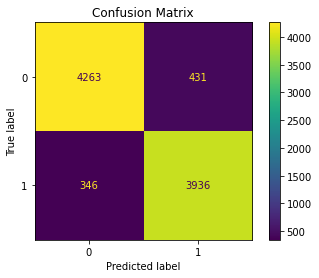

In [90]:
from sklearn.naive_bayes import MultinomialNB
mnb_clf= MultinomialNB()
mnb_clf.fit(X_text_data,train_data_df['News_Type'])
print('fitted MNB model')
y_train_1=train_data_df['News_Type']
y_train_pred= mnb_clf.predict(X_text_data)
print(f'The training dataset accuracy is: {sm.accuracy_score(y_train_1,y_train_pred)}')
get_classification_metrics(mnb_clf,X_test_text_data,test_data_df['News_Type'])


#### Gaussian Naive Bayes

The training dataset accuracy is: 0.901431595365419


classification report
              precision    recall  f1-score   support

           0       0.92      0.89      0.90      4694
           1       0.88      0.91      0.90      4282

    accuracy                           0.90      8976
   macro avg       0.90      0.90      0.90      8976
weighted avg       0.90      0.90      0.90      8976


Accuracy of model:  0.8997326203208557


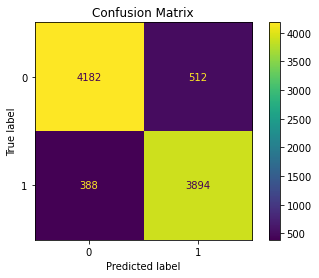

In [91]:
from sklearn.naive_bayes import GaussianNB
gnb_clf= GaussianNB()
gnb_clf.fit(X_text_data,train_data_df['News_Type'])
y_train_pred= gnb_clf.predict(X_text_data)
print(f'The training dataset accuracy is: {sm.accuracy_score(y_train_1,y_train_pred)}')
get_classification_metrics(gnb_clf,X_test_text_data,test_data_df['News_Type'])

### Logistic Regression


fitted Logistic Regression model
The training dataset accuracy is: 0.9654634581105169


classification report
              precision    recall  f1-score   support

           0       0.97      0.96      0.96      4694
           1       0.96      0.96      0.96      4282

    accuracy                           0.96      8976
   macro avg       0.96      0.96      0.96      8976
weighted avg       0.96      0.96      0.96      8976


Accuracy of model:  0.9607843137254902


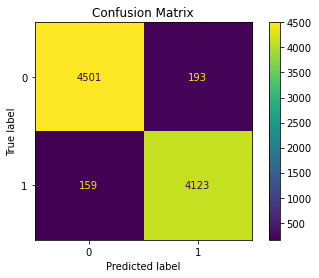

In [92]:
from sklearn.linear_model import LogisticRegression
logreg_clf=LogisticRegression()
logreg_clf.fit(X_text_data,train_data_df['News_Type'])
print('fitted Logistic Regression model')
y_train_pred= logreg_clf.predict(X_text_data)
print(f'The training dataset accuracy is: {sm.accuracy_score(y_train_1,y_train_pred)}')
get_classification_metrics(logreg_clf,X_test_text_data,test_data_df['News_Type'])

### RandomForest Classifier

fitted Random forest classifier
The training dataset accuracy is: 1.0


classification report
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      4694
           1       0.97      0.97      0.97      4282

    accuracy                           0.97      8976
   macro avg       0.97      0.97      0.97      8976
weighted avg       0.97      0.97      0.97      8976


Accuracy of model:  0.9721479500891266


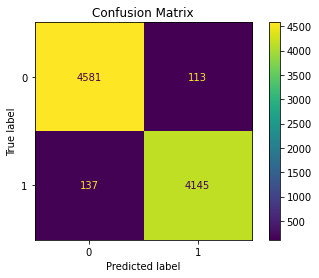

In [93]:
from sklearn.ensemble import RandomForestClassifier
rf_clf= RandomForestClassifier(random_state=0)
rf_clf.fit(X_text_data,train_data_df['News_Type'])
print('fitted Random forest classifier')
y_train_pred= rf_clf.predict(X_text_data)
print(f'The training dataset accuracy is: {sm.accuracy_score(y_train_1,y_train_pred)}')
get_classification_metrics(rf_clf,X_test_text_data,test_data_df['News_Type'])

#### Adaboost Classifier

fitted adaboost model
The training dataset accuracy is: 0.9484180035650623


classification report
              precision    recall  f1-score   support

           0       0.95      0.93      0.94      4694
           1       0.93      0.95      0.94      4282

    accuracy                           0.94      8976
   macro avg       0.94      0.94      0.94      8976
weighted avg       0.94      0.94      0.94      8976


Accuracy of model:  0.9400623885918004


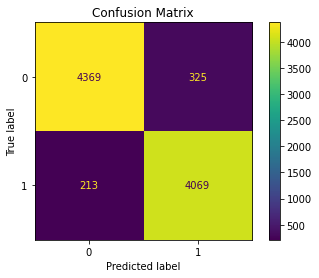

In [94]:
from sklearn.ensemble import AdaBoostClassifier
adaboost_clf= AdaBoostClassifier(random_state=0)
adaboost_clf.fit(X_text_data,train_data_df['News_Type'])
print('fitted adaboost model')
y_train_pred= adaboost_clf.predict(X_text_data)
print(f'The training dataset accuracy is: {sm.accuracy_score(y_train_1,y_train_pred)}')
get_classification_metrics(adaboost_clf,X_test_text_data,test_data_df['News_Type'])

#### Gradient Boosting Classifier

fitted Gradient Boosting model
The training dataset accuracy is: 0.9555759803921569


classification report
              precision    recall  f1-score   support

           0       0.96      0.93      0.95      4694
           1       0.92      0.96      0.94      4282

    accuracy                           0.94      8976
   macro avg       0.94      0.94      0.94      8976
weighted avg       0.95      0.94      0.94      8976


Accuracy of model:  0.9441844919786097


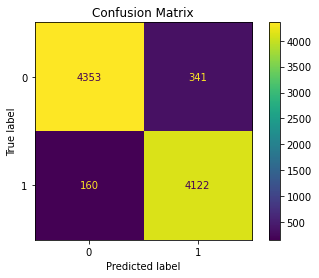

In [95]:
from sklearn.ensemble import GradientBoostingClassifier
gb_clf= GradientBoostingClassifier(random_state=0)
gb_clf.fit(X_text_data,train_data_df['News_Type'])
print('fitted Gradient Boosting model')
y_train_pred= gb_clf.predict(X_text_data)
print(f'The training dataset accuracy is: {sm.accuracy_score(y_train_1,y_train_pred)}')
get_classification_metrics(gb_clf,X_test_text_data,test_data_df['News_Type'])

#### XGBoost Classifier

fitted XGB model
The training dataset accuracy is: 0.9984959893048129


classification report
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      4694
           1       0.97      0.98      0.97      4282

    accuracy                           0.98      8976
   macro avg       0.98      0.98      0.98      8976
weighted avg       0.98      0.98      0.98      8976


Accuracy of model:  0.9760472370766489


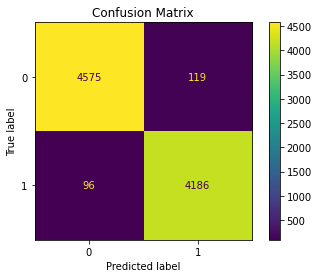

In [96]:
from xgboost import XGBClassifier
xgb_clf= XGBClassifier(random_state=0)
xgb_clf.fit(X_text_data,train_data_df['News_Type'])
print('fitted XGB model')
y_train_pred=xgb_clf.predict(X_text_data)
print(f'The training dataset accuracy is: {sm.accuracy_score(y_train_1,y_train_pred)}')
get_classification_metrics(xgb_clf,X_test_text_data,test_data_df['News_Type'])

#### Catboost Classifier

Learning rate set to 0.047531
0:	learn: 0.6422382	total: 167ms	remaining: 2m 46s
1:	learn: 0.6039147	total: 267ms	remaining: 2m 13s
2:	learn: 0.5651365	total: 364ms	remaining: 2m 1s
3:	learn: 0.5343102	total: 456ms	remaining: 1m 53s
4:	learn: 0.5106051	total: 550ms	remaining: 1m 49s
5:	learn: 0.4878466	total: 643ms	remaining: 1m 46s
6:	learn: 0.4697793	total: 737ms	remaining: 1m 44s
7:	learn: 0.4533928	total: 836ms	remaining: 1m 43s
8:	learn: 0.4379365	total: 931ms	remaining: 1m 42s
9:	learn: 0.4252820	total: 1.02s	remaining: 1m 41s
10:	learn: 0.4113052	total: 1.12s	remaining: 1m 40s
11:	learn: 0.3989800	total: 1.22s	remaining: 1m 40s
12:	learn: 0.3891616	total: 1.31s	remaining: 1m 39s
13:	learn: 0.3801207	total: 1.4s	remaining: 1m 38s
14:	learn: 0.3700528	total: 1.5s	remaining: 1m 38s
15:	learn: 0.3623919	total: 1.59s	remaining: 1m 37s
16:	learn: 0.3551440	total: 1.69s	remaining: 1m 37s
17:	learn: 0.3484572	total: 1.77s	remaining: 1m 36s
18:	learn: 0.3406733	total: 1.87s	remaining: 1m

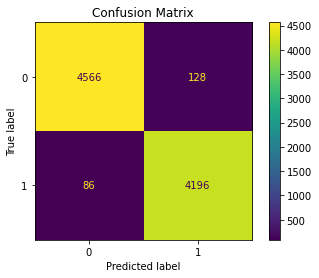

In [97]:
cb_clf= cb.CatBoostClassifier(random_state=0)
cb_clf.fit(X_text_data,train_data_df['News_Type'])
print('fitted Catboost model')
y_train_pred= cb_clf.predict(X_text_data)
print(f'The training dataset accuracy is: {sm.accuracy_score(y_train_1,y_train_pred)}')
get_classification_metrics(cb_clf,X_test_text_data,test_data_df['News_Type'])

#### Observations

1. All models tried on text data has good metrics interms of accuracy, classification report etc

2. Among the models tried, CatBoost, xgb ,random forest classifier gave better accuracy, recall percision etc

### Applying model on dataset [include text dataset + non text datasets ]

In [98]:
train_data_df_final= pd.concat([train_data_df,X_text_data],axis=1)
le_2= LabelEncoder()
train_data_df_final['Article_Subject']= le_2.fit_transform(train_data_df_final['Article_Subject'])
train_data_df_final.head()

,Article_Subject,Special-Characters-Count,Article_Content_Length,word_count,News_Type,able,access,according,account,accused,...,worked,worker,working,world,wrong,wrote,yearold,yet,york,young
0,2,541,1856,250,0,0.0,0.000000,0.000000,0.0,0.0,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.057943,0.0
1,6,722,2467,343,1,0.0,0.080748,0.000000,0.0,0.0,...,0.080507,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0
2,6,553,2002,274,1,0.0,0.000000,0.000000,0.0,0.0,...,0.000000,0.0,0.000000,0.062855,0.000000,0.0,0.0,0.0,0.000000,0.0
3,6,153,562,78,1,0.0,0.000000,0.000000,0.0,0.0,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0
4,6,502,1762,245,1,0.0,0.000000,0.043716,0.0,0.0,...,0.000000,0.0,0.054535,0.000000,0.065487,0.0,0.0,0.0,0.000000,0.0


In [99]:
X_train= train_data_df_final.drop('News_Type',axis=1)
y_train= train_data_df_final['News_Type']


In [100]:
test_data_df.head()

,Article_Subject,Special-Characters-Count,Article_Content_Length,word_count,News_Type
0,worldnews,609,2512,330,1
1,News,534,1662,248,0
2,worldnews,1031,3484,496,1
3,worldnews,469,1748,232,1
4,worldnews,563,2172,295,1


In [101]:
test_data_df['Article_Subject']= le_2.transform(test_data_df['Article_Subject'])
test_data_df_final= pd.concat([test_data_df,X_test_text_data],axis=1)
X_test= test_data_df_final.drop('News_Type',axis=1)
y_test= test_data_df_final['News_Type']

In [102]:
test_data_df_final.head()

,Article_Subject,Special-Characters-Count,Article_Content_Length,word_count,News_Type,able,access,according,account,accused,...,worked,worker,working,world,wrong,wrote,yearold,yet,york,young
0,6,609,2512,330,1,0.000000,0.233002,0.051961,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
1,2,534,1662,248,0,0.000000,0.000000,0.075975,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.089006,0.0
2,6,1031,3484,496,1,0.041019,0.000000,0.000000,0.223978,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
3,6,469,1748,232,1,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
4,6,563,2172,295,1,0.000000,0.000000,0.103403,0.000000,0.0,...,0.0,0.0,0.0,0.108289,0.0,0.0,0.0,0.0,0.000000,0.0


#### Multinomial Naive Bayes model

fitted mnb model
The training dataset accuracy is: 0.8372604723707665


classification report
              precision    recall  f1-score   support

           0       0.90      0.77      0.83      4694
           1       0.78      0.91      0.84      4282

    accuracy                           0.83      8976
   macro avg       0.84      0.84      0.83      8976
weighted avg       0.84      0.83      0.83      8976


Accuracy of model:  0.8346702317290553


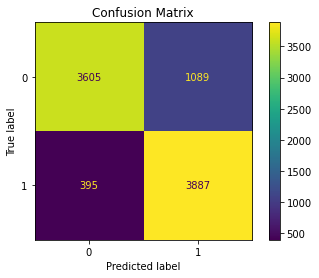

In [103]:
from sklearn.naive_bayes import MultinomialNB
mnb_clf_1= MultinomialNB()
mnb_clf_1.fit(X_train,y_train)
print('fitted mnb model')
y_train_pred= mnb_clf_1.predict(X_train)
print(f'The training dataset accuracy is: {sm.accuracy_score(y_train,y_train_pred)}')
get_classification_metrics(mnb_clf_1,X_test,y_test)

#### Gaussian Naive Bayes

The training dataset accuracy is: 0.9168337789661319


classification report
              precision    recall  f1-score   support

           0       0.94      0.89      0.92      4694
           1       0.89      0.94      0.91      4282

    accuracy                           0.91      8976
   macro avg       0.91      0.91      0.91      8976
weighted avg       0.92      0.91      0.91      8976


Accuracy of model:  0.9137700534759359


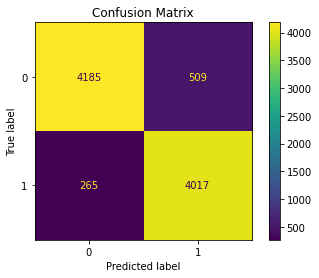

In [104]:
from sklearn.naive_bayes import GaussianNB
gnb_clf_1= GaussianNB()
gnb_clf_1.fit(X_train,y_train)
y_train_pred= gnb_clf_1.predict(X_train)
print(f'The training dataset accuracy is: {sm.accuracy_score(y_train,y_train_pred)}')
get_classification_metrics(gnb_clf_1,X_test,y_test)

#### Logistic Regression

fitted Logistic regression
The training dataset accuracy is: 0.9508411319073083


classification report
              precision    recall  f1-score   support

           0       0.97      0.93      0.95      4694
           1       0.92      0.97      0.95      4282

    accuracy                           0.95      8976
   macro avg       0.95      0.95      0.95      8976
weighted avg       0.95      0.95      0.95      8976


Accuracy of model:  0.9484180035650623


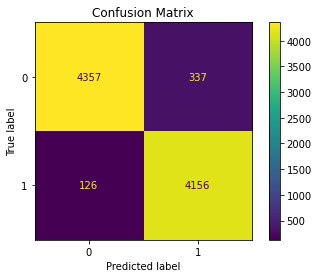

In [105]:
from sklearn.linear_model import LogisticRegression
logreg_clf_1= LogisticRegression()
logreg_clf_1.fit(X_train,y_train)
print('fitted Logistic regression')
y_train_pred= logreg_clf_1.predict(X_train)
print(f'The training dataset accuracy is: {sm.accuracy_score(y_train,y_train_pred)}')
get_classification_metrics(logreg_clf_1,X_test,y_test)

#### RandomForest Classifier

fitted random forest classifier
The training dataset accuracy is: 1.0


classification report
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      4694
           1       0.98      0.99      0.98      4282

    accuracy                           0.98      8976
   macro avg       0.98      0.98      0.98      8976
weighted avg       0.98      0.98      0.98      8976


Accuracy of model:  0.9838458110516934


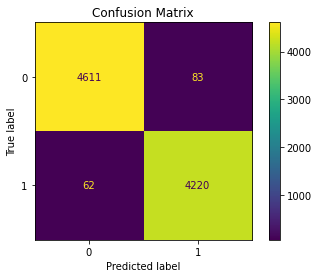

In [106]:
from sklearn.ensemble import RandomForestClassifier
rf_clf_1= RandomForestClassifier(random_state=0)
rf_clf_1.fit(X_train,y_train)
print('fitted random forest classifier')
y_train_pred= rf_clf_1.predict(X_train)
print(f'The training dataset accuracy is: {sm.accuracy_score(y_train,y_train_pred)}')
get_classification_metrics(rf_clf_1,X_test,y_test)

#### Adaboost Classifier

fitted adaboost classifier
The training dataset accuracy is: 0.9781082887700535


classification report
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      4694
           1       0.97      0.98      0.97      4282

    accuracy                           0.98      8976
   macro avg       0.98      0.98      0.98      8976
weighted avg       0.98      0.98      0.98      8976


Accuracy of model:  0.9754901960784313


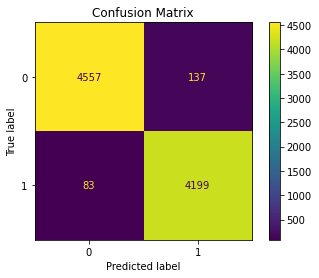

In [107]:
from sklearn.ensemble import AdaBoostClassifier
adaboost_clf_1= AdaBoostClassifier(random_state=0)
adaboost_clf_1.fit(X_train,y_train)
print('fitted adaboost classifier')
y_train_pred= adaboost_clf_1.predict(X_train)
print(f'The training dataset accuracy is: {sm.accuracy_score(y_train,y_train_pred)}')
get_classification_metrics(adaboost_clf_1,X_test,y_test)

#### Gradient Boost Classifier

fitted gradient boosting classifier
The training dataset accuracy is: 0.9786653297682709


classification report
              precision    recall  f1-score   support

           0       0.99      0.96      0.98      4694
           1       0.96      0.99      0.97      4282

    accuracy                           0.97      8976
   macro avg       0.97      0.97      0.97      8976
weighted avg       0.97      0.97      0.97      8976


Accuracy of model:  0.9742647058823529


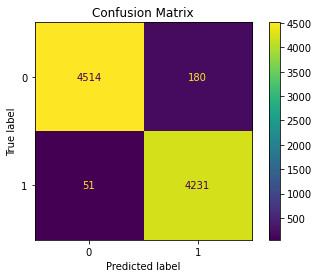

In [108]:
from sklearn.ensemble import GradientBoostingClassifier
gb_clf_1= GradientBoostingClassifier(random_state=0)
gb_clf_1.fit(X_train,y_train)
print('fitted gradient boosting classifier')
y_train_pred= gb_clf_1.predict(X_train)
print(f'The training dataset accuracy is: {sm.accuracy_score(y_train,y_train_pred)}')
get_classification_metrics(gb_clf_1,X_test,y_test)

### XGB Classifier

fitted XGB model
The training dataset accuracy is: 0.9998328877005348


classification report
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      4694
           1       0.98      0.99      0.99      4282

    accuracy                           0.99      8976
   macro avg       0.99      0.99      0.99      8976
weighted avg       0.99      0.99      0.99      8976


Accuracy of model:  0.9856283422459893


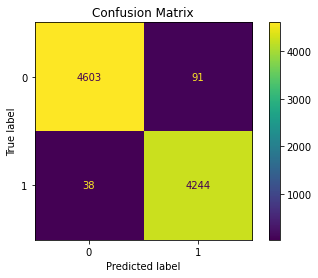

In [109]:
xgb_clf_1= XGBClassifier(random_state=0)
xgb_clf_1.fit(X_train,y_train)
print('fitted XGB model')
y_train_pred= xgb_clf_1.predict(X_train)
print(f'The training dataset accuracy is: {sm.accuracy_score(y_train,y_train_pred)}')
get_classification_metrics(xgb_clf_1,X_test,y_test)

### Catboost classifier

Learning rate set to 0.047531
0:	learn: 0.5734622	total: 125ms	remaining: 2m 5s
1:	learn: 0.4814182	total: 240ms	remaining: 1m 59s
2:	learn: 0.4104131	total: 349ms	remaining: 1m 55s
3:	learn: 0.3581070	total: 456ms	remaining: 1m 53s
4:	learn: 0.3153852	total: 572ms	remaining: 1m 53s
5:	learn: 0.2813085	total: 678ms	remaining: 1m 52s
6:	learn: 0.2605079	total: 784ms	remaining: 1m 51s
7:	learn: 0.2381889	total: 893ms	remaining: 1m 50s
8:	learn: 0.2210216	total: 1s	remaining: 1m 50s
9:	learn: 0.2068529	total: 1.12s	remaining: 1m 50s
10:	learn: 0.1981513	total: 1.24s	remaining: 1m 51s
11:	learn: 0.1903016	total: 1.35s	remaining: 1m 51s
12:	learn: 0.1816076	total: 1.47s	remaining: 1m 51s
13:	learn: 0.1741399	total: 1.59s	remaining: 1m 52s
14:	learn: 0.1691408	total: 1.71s	remaining: 1m 52s
15:	learn: 0.1643638	total: 1.83s	remaining: 1m 52s
16:	learn: 0.1601806	total: 1.94s	remaining: 1m 52s
17:	learn: 0.1560233	total: 2.06s	remaining: 1m 52s
18:	learn: 0.1523706	total: 2.17s	remaining: 1m 

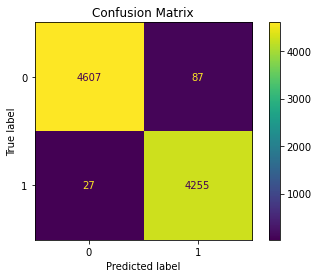

In [110]:
cb_clf_1= cb.CatBoostClassifier(random_state=0)
cb_clf_1.fit(X_train,y_train)
print('fitted Catboost model')
y_train_pred= cb_clf_1.predict(X_train)
print(f'The training dataset accuracy is: {sm.accuracy_score(y_train,y_train_pred)}')
get_classification_metrics(cb_clf_1,X_test,y_test)

#### Comparing models trained on text data and text+non-text data 

In [111]:
text_models=[mnb_clf,gnb_clf,logreg_clf,rf_clf,adaboost_clf,gb_clf,xgb_clf,cb_clf]

non_text_models=[mnb_clf_1,gnb_clf_1,logreg_clf_1,rf_clf_1,adaboost_clf_1,gb_clf_1,xgb_clf_1,cb_clf_1]


In [112]:
#study accuracy on basis of models which is trained only on text data
accuracy_text_models=[]
for model in text_models:
    y_pred= model.predict(X_test_text_data)
    accuracy_text_models.append(sm.accuracy_score(test_data_df['News_Type'],y_pred))


In [113]:
print(accuracy_text_models)

[0.9134358288770054, 0.8997326203208557, 0.9607843137254902, 0.9721479500891266, 0.9400623885918004, 0.9441844919786097, 0.9760472370766489, 0.9761586452762924]


In [114]:
accuracy_text_nontext_models=[]
for model in non_text_models:
    y_pred= model.predict(X_test)
    accuracy_text_nontext_models.append(sm.accuracy_score(y_test,y_pred))

print(accuracy_text_nontext_models)
    

[0.8346702317290553, 0.9137700534759359, 0.9484180035650623, 0.9838458110516934, 0.9754901960784313, 0.9742647058823529, 0.9856283422459893, 0.9872994652406417]


In [115]:
###create final report dataframe
final_model_report= pd.DataFrame({'Classifier Model':['Multinomial NB','Gaussian NB','Logistic Regression','Random Forest','Adaboost','Gradient Boosting','XGB','Catboost'],'Accuracy (text data)':accuracy_text_models,'Accuracy (text+nontext)':accuracy_text_nontext_models})

final_model_report

,Classifier Model,Accuracy (text data),Accuracy (text+nontext)
0,Multinomial NB,0.913436,0.834670
1,Gaussian NB,0.899733,0.913770
2,Logistic Regression,0.960784,0.948418
3,Random Forest,0.972148,0.983846
4,Adaboost,0.940062,0.975490
5,Gradient Boosting,0.944184,0.974265
6,XGB,0.976047,0.985628
7,Catboost,0.976159,0.987299


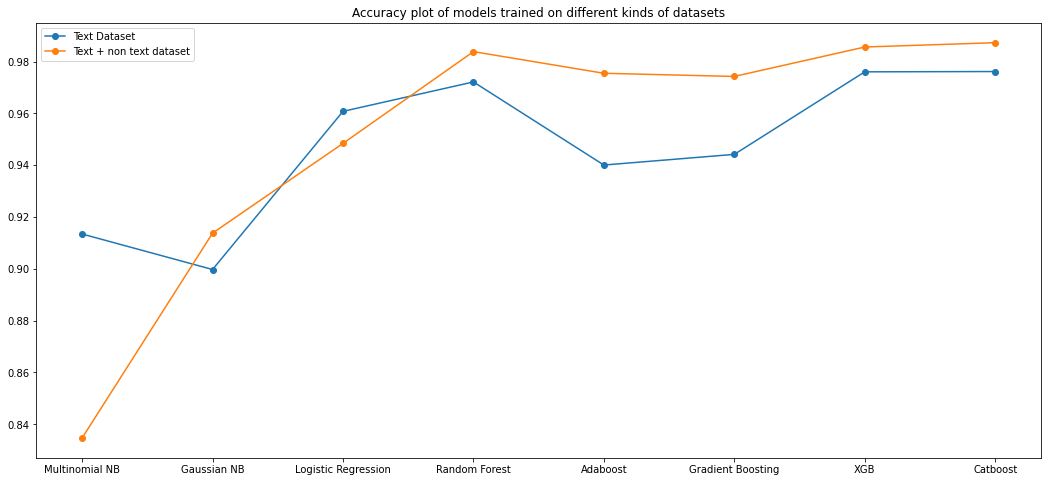

In [116]:
#### plotting using line plot to get a clear pic
plt.figure(figsize=(18,8))
plt.plot(final_model_report['Classifier Model'],final_model_report['Accuracy (text data)'],label='Text Dataset',marker='o')
plt.plot(final_model_report['Classifier Model'],final_model_report['Accuracy (text+nontext)'],label='Text + non text dataset',marker='o')
plt.legend()
plt.title('Accuracy plot of models trained on different kinds of datasets')
plt.show()

#### Observations drawn from above graph

1. All models are performing well.

2. Among the models, it is seen that those trained on text+non text has higher accuracy for some like Gaussian NB, RandomForest, Adaboost,Gradient Boost, XGB, Catboost than models trained on text dataset

3. Multinomial NB is seen to have an accuracy of 0.83 when trained on text+non text data & 0.91 when trained on text data only.

3. Gaussian NB is giving 0.89 on models trained on text dataset and 0.91 when trained on text + non text data

4. In general, Building model on text+non text dataset would develop a better as it has more information than text datasets

## --------------------------------------------------------------------------------------------------------------------